# Глобальная оптимизация и оптимизация негладкой функции

## Суть 

Решить задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, посмотреть на отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найти глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

In [0]:
import math
import numpy as np
from scipy.optimize import minimize, differential_evolution
import matplotlib.pyplot as plt

In [0]:
def f(x):
  return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

## Задача 1. Минимизация гладкой функции

Рассмотрим заданную функцию на промежутке [1, 30] 

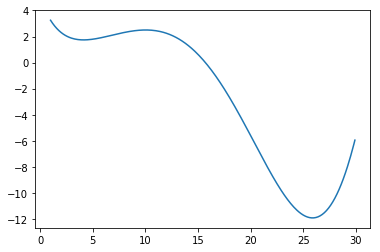

In [21]:
data_x = np.arange(1, 30, 0.1)
data_y = [f(x) for x in data_x]

plt.plot(data_x, data_y)

Попробуем найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение)

In [24]:
minimize(f, 2).fun

1.7452682903449388

Посмотрим, меняется ли результат,  при изменении начального приближения

[1.7452682903319903, 1.745268290332218, 1.7452682903449388, 1.7452682905867012, 1.7452682904133416, 1.745268290331984, 1.7452682903321235, 1.7452682903320125, 1.7452682903319738, 1.7452682903470087, 1.7452682903428007, -11.898894665981311, -11.898894665980812, -6371.7652291657405, -11.898894665981317, -11.503580757136064, -11.898894665971543, -11.898894665901345, -11.8988946659724, -11.898894665898753, -11.898894665971952, -11.89889466593321, -11.898894665981025, -11.89889466598132, -11.898894665979714, -11.89889466596626, -11.898894665979789, -11.898894665974735, -11.898894665981295, -11.89889466594364]


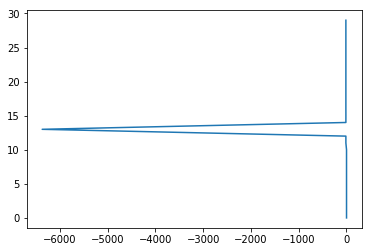

In [27]:
sp = range(30)
res = [minimize(f, s).fun for s in sp]
print(res)
plt.plot(res, sp)

Укажем в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), и начальное приближение x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума -  первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой

In [30]:
answ11 = round(minimize(f, 2, method='BFGS').fun, 2)
answ11

1.75

Изменим начальное приближение на x=30. Значение функции в точке минимума -  второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [31]:
answ12 = round(minimize(f, 30, method='BFGS').fun, 2)
answ12

-11.9

В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные. Запишем файл с ответом

In [33]:
answer = '{} {}'.format(answ11, answ12) 
with open('C1W3 answer 1', 'w') as output_file:
  output_file.write(answer)
answer

'1.75 -11.9'

## Задача 2. Глобальная оптимизация
Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.  
Запустим поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. 

In [38]:
answer2 = str(round(differential_evolution(f, bounds=[(1,30)]).fun, 2))
with open('C1W3 answer 2', 'w') as output_file:
  output_file.write(answer2)
answer2

'-11.9'

## Задача 3. Минимизация негладкой функции
Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

Такая функция будет негладкой, а ее график будет иметь ступенчатый вид. Убедимся в этом, построив график h(x) с помощью matplotlib

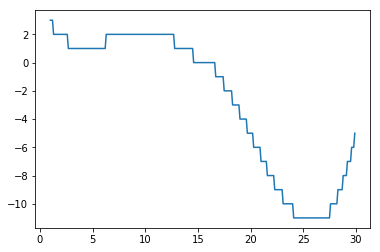

In [52]:
def h(x):
  return int(f(x))


data_y_by_h = [h(x) for x in data_x]   
plt.plot(data_x, data_y_by_h)

Попробуем найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – первый ответ в этой задаче

In [56]:
answ31 = minimize(h, 30, method='BFGS').fun
answ31

-5

Теперь попробуем найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это второй ответ в этом задании

In [58]:
answ32 = differential_evolution(h, bounds=[(1,30)]).fun
answ32

-11.0

Полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции

In [59]:
answer3 = '{} {}'.format(answ31, answ32) 
with open('C1W3 answer 3', 'w') as output_file:
  output_file.write(answer3)
answer3

'-5 -11.0'